In [1]:
## Analysis Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
## Data Import
#Opioid Settlement Expenditures Data https://kffhealthnews.org/download-the-data-opioid-settlement-expenditures/ (Obtained from: KFF Health News, the Johns Hopkins Bloomberg School of Public Health, and Shatterproof
opioidSettlementSummary = pd.read_excel("/Users/kjh60/Downloads/opioid-settlement-expenditures-downloadable-data-121224-2.xlsx",sheet_name = "Summary Data",header = 1)

populationPerState2020 =  pd.read_csv("/Users/kjh60/Downloads/DECENNIALCD1182020.P1-2024-12-17T184844.csv",header = None,skiprows = 1,names=['State','TotalPopulation'])
povertyPerState2021 = pd.read_csv("/Users/kjh60/Downloads/PovertyReportExactNumbers.csv",header = None, skiprows = 3, names=['State', 'TotalPoverty', 'LowerBound_TotalPoverty', 'UpperBound_TotalPoverty', 'ChildhoodPoverty', 'LowerBound_ChildhoodPoverty','UpperBound_ChildhoodPoverty'])
unemploymentRate = pd.read_csv("/Users/kjh60/Downloads/UnemploymentReportPercent.csv",header = None,skiprows = 1,names=['State','unemployment_2014','unemployment_2015','unemployment_2016','unemployment_2017','unemployment_2018','unemployment_2019','unemployment_2020','unemployment_2021','unemployment_2022','NotGiven','NotGiven2'])
drugOverdoseDeaths = pd.read_csv("/Users/kjh60/Downloads/DrugOverdoseDeaths.csv")
medianHouseholdIncome = pd.read_csv("/Users/kjh60/Downloads/MedianHouseholdIncome.csv",header = None,skiprows = 1,names=['State','MedianHouseholdIncome'])

In [3]:
## Data Cleaning
unemploymentRate = unemploymentRate.drop(['NotGiven','NotGiven2'],axis=1)

# clean up the strings to remove characters we can't use
for n in range(0,povertyPerState2021['TotalPoverty'].size):
    povertyPerState2021['TotalPoverty'][n] = povertyPerState2021['TotalPoverty'][n].replace(",","")
    povertyPerState2021['ChildhoodPoverty'][n] = povertyPerState2021['ChildhoodPoverty'][n].replace(",","")
    
for n in range(0,populationPerState2020['TotalPopulation'].size):
    populationPerState2020['TotalPopulation'][n] = populationPerState2020['TotalPopulation'][n].replace(",","")
    
for n in range(0,drugOverdoseDeaths['Deaths'].size):
    drugOverdoseDeaths['Deaths'][n] = drugOverdoseDeaths['Deaths'][n].replace(",","")
    
drugOverdoseDeaths = drugOverdoseDeaths[drugOverdoseDeaths["Year"] == 2022]

for n in range(0,medianHouseholdIncome['MedianHouseholdIncome'].size-1):
    medianHouseholdIncome['MedianHouseholdIncome'][n] = medianHouseholdIncome['MedianHouseholdIncome'][n].replace(",","")
    medianHouseholdIncome['MedianHouseholdIncome'][n] = medianHouseholdIncome['MedianHouseholdIncome'][n].replace("$","")

#convert the strings into proper data types
drugOverdoseDeaths['Deaths'] = drugOverdoseDeaths['Deaths'].astype(float)
drugOverdoseDeaths['Rate'] = drugOverdoseDeaths['Rate'].astype(float)
povertyPerState2021['TotalPoverty'] = povertyPerState2021['TotalPoverty'].astype(float)
populationPerState2020['TotalPopulation'] = populationPerState2020['TotalPopulation'].astype(float)
medianHouseholdIncome['MedianHouseholdIncome'] = medianHouseholdIncome['MedianHouseholdIncome'].astype(float)

/var/folders/pp/hwb4s2dn0dl65y07xq8qr3140000gn/T/ipykernel_35217/356897835.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  drugOverdoseDeaths['Deaths'][n] = drugOverdoseDeaths['Deaths'][n].replace(",","")
/var/folders/pp/hwb4s2dn0dl65y07xq8qr3140000gn/T/ipykernel_35217/356897835.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  drugOverdoseDeaths['Deaths'][n] = drugOverdoseDeaths['Deaths'][n].replace(",","")
/var/folders/pp/hwb4s2dn0dl65y07xq8qr3140000gn/T/ipykernel_35217/356897835.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documenta

In [4]:
## Combine data sets into a master table
opioidSettlementSummary_PopulationPerState2020 = pd.merge(opioidSettlementSummary, populationPerState2020,how="left", on=["State"]);
opioidSettlementSummary_PopulationPerState2020_povertyPerState2021 = pd.merge(opioidSettlementSummary_PopulationPerState2020, povertyPerState2021,how="left", on=["State"]);
opioidSettlementSummary_PopulationPerState2020_povertyPerState2021_medianHouseholdIncome = pd.merge(opioidSettlementSummary_PopulationPerState2020_povertyPerState2021, medianHouseholdIncome,how="left", on=["State"]);
opioidSettlementSummary_PopulationPerState2020_povertyPerState2021_medianHouseholdIncome_drugOverdoseDeaths2022 = pd.merge(opioidSettlementSummary_PopulationPerState2020_povertyPerState2021_medianHouseholdIncome, drugOverdoseDeaths,how="left", on=["State"]);

totalInformation = pd.merge(opioidSettlementSummary_PopulationPerState2020_povertyPerState2021_medianHouseholdIncome_drugOverdoseDeaths2022, unemploymentRate,how="left", on=["State"]);  

dataSizeTotalInformation = totalInformation.shape
OpioidSettlementReceivedPerPerson=[]
OpioidSettlementUntrackedPerPerson=[]

for n in range(0,dataSizeTotalInformation[0]):
    OpioidSettlementReceivedPerPerson.append(totalInformation['Opioid Settlement Funds Received (2022-2023)'][n]/totalInformation['TotalPopulation'][n])
    OpioidSettlementUntrackedPerPerson.append(totalInformation['Opioid Settlement Funds Untrackable via Public Reports (2022-2023)'][n]/totalInformation['TotalPopulation'][n])
    
totalInformation['OpioidSettlementReceivedPerPerson'] = OpioidSettlementReceivedPerPerson
totalInformation['OpioidSettlementUntrackedPerPerson'] = OpioidSettlementUntrackedPerPerson

working_df=totalInformation[['TotalPoverty','TotalPopulation','MedianHouseholdIncome','unemployment_2022','Deaths','Rate','Opioid Settlement Funds Received (2022-2023)','Opioid Settlement Funds Untrackable via Public Reports (2022-2023)','OpioidSettlementReceivedPerPerson','OpioidSettlementUntrackedPerPerson']]

In [5]:
# Find correlation of data
a = working_df.corr()

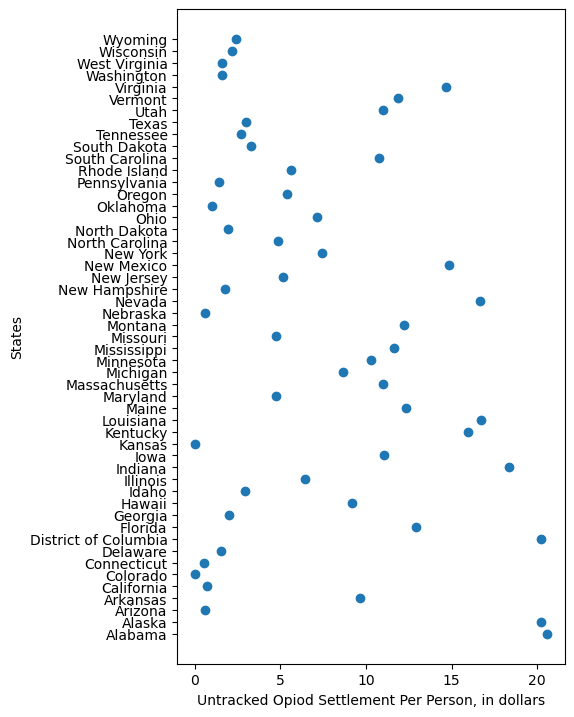

In [6]:
plt.figure(figsize=(5, 8.5)) 
plt.scatter(totalInformation['OpioidSettlementUntrackedPerPerson'],totalInformation['State'])
plt.xlabel("Untracked Opiod Settlement Per Person, in dollars")
plt.ylabel("States")
plt.show()

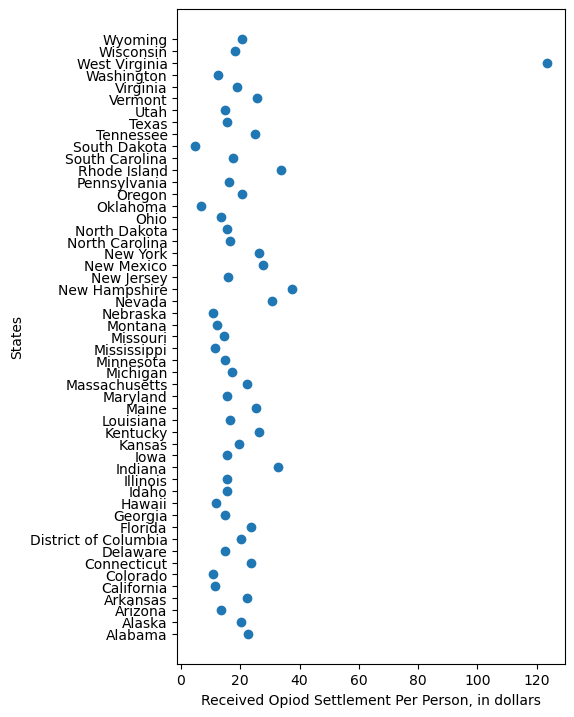

In [7]:
plt.figure(figsize=(5, 8.5)) 
plt.scatter(totalInformation['OpioidSettlementReceivedPerPerson'],totalInformation['State'])
plt.xlabel("Received Opiod Settlement Per Person, in dollars")
plt.ylabel("States")
plt.show()

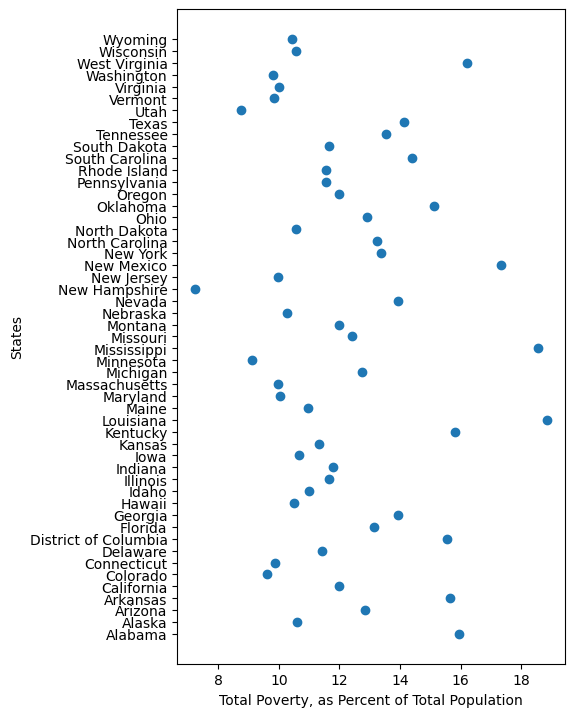

In [8]:
plt.figure(figsize=(5, 8.5))
plt.scatter(100*totalInformation['TotalPoverty']/totalInformation['TotalPopulation'],totalInformation['State'])
plt.xlabel("Total Poverty, as Percent of Total Population")
plt.ylabel("States")
plt.show()